Install the dependency and library

In [1]:
%pip install seaborn
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import packages such as panda etc

In [2]:
##%%writefile iris_eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Set the shell so that all output can be displayed

In [3]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

Import the data iris


In [4]:
raw_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv') # Read data from URL


Explore the data

In [5]:
# raw_data.describe() # Summary statistics
# raw_data.info() # Data types and missing values
raw_data.axes # Row and column labels
raw_data.axes[1] # Row labels

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Remove the last column before normalisation

In [6]:
raw_features= raw_data.drop('species', axis=1, inplace=False) # Drop species column

Check the raw feature

In [7]:
raw_features.head() # First 5 rows
raw_features.describe() # Summary statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Standardlise the feature only data


In [8]:
scaler = StandardScaler() # Create an instance of the scaler, this will be used to scale the data before clustering because the features are on different scales so we need to standardise them
features_ = scaler.fit(raw_features) # Fit the scaler to the training data
features = features_.transform(raw_features) # Transform the features using the scaler
scaled_df = pd.DataFrame(features, columns=raw_features.columns) # Create a dataframe from the scaled features
X = scaled_df.values # Get the values from the dataframe



Check the normalised feature data

In [9]:
# scaled_df.head()
# scaled_df.describe()
# scaled_df.boxplot()
scaled_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


Define function to build color mapping base on the species


In [10]:
def label_spicies(row):
    if row['species'] == 'setosa':
        return 0
    if row['species'] == 'versicolor':
        return 1
    if row['species'] == 'virginica':
        return 2

Apply the new color to the new DF colored


In [13]:
raw_data["color"] = raw_data.apply(label_spicies, axis=1)
# type(raw_data)

# raw_data['color'] = [i*500 for i in range(150)]

# raw_data.head()

Check the raw_data again 

In [15]:
raw_data.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species  color
0             5.1          3.5           1.4          0.2     setosa      0
1             4.9          3.0           1.4          0.2     setosa      0
2             4.7          3.2           1.3          0.2     setosa      0
3             4.6          3.1           1.5          0.2     setosa      0
4             5.0          3.6           1.4          0.2     setosa      0
..            ...          ...           ...          ...        ...    ...
145           6.7          3.0           5.2          2.3  virginica      2
146           6.3          2.5           5.0          1.9  virginica      2
147           6.5          3.0           5.2          2.0  virginica      2
148           6.2          3.4           5.4          2.3  virginica      2
149           5.9          3.0           5.1          1.8  virginica      2

[150 rows x 6 columns]>

Draw the original cluster image in different combination of features


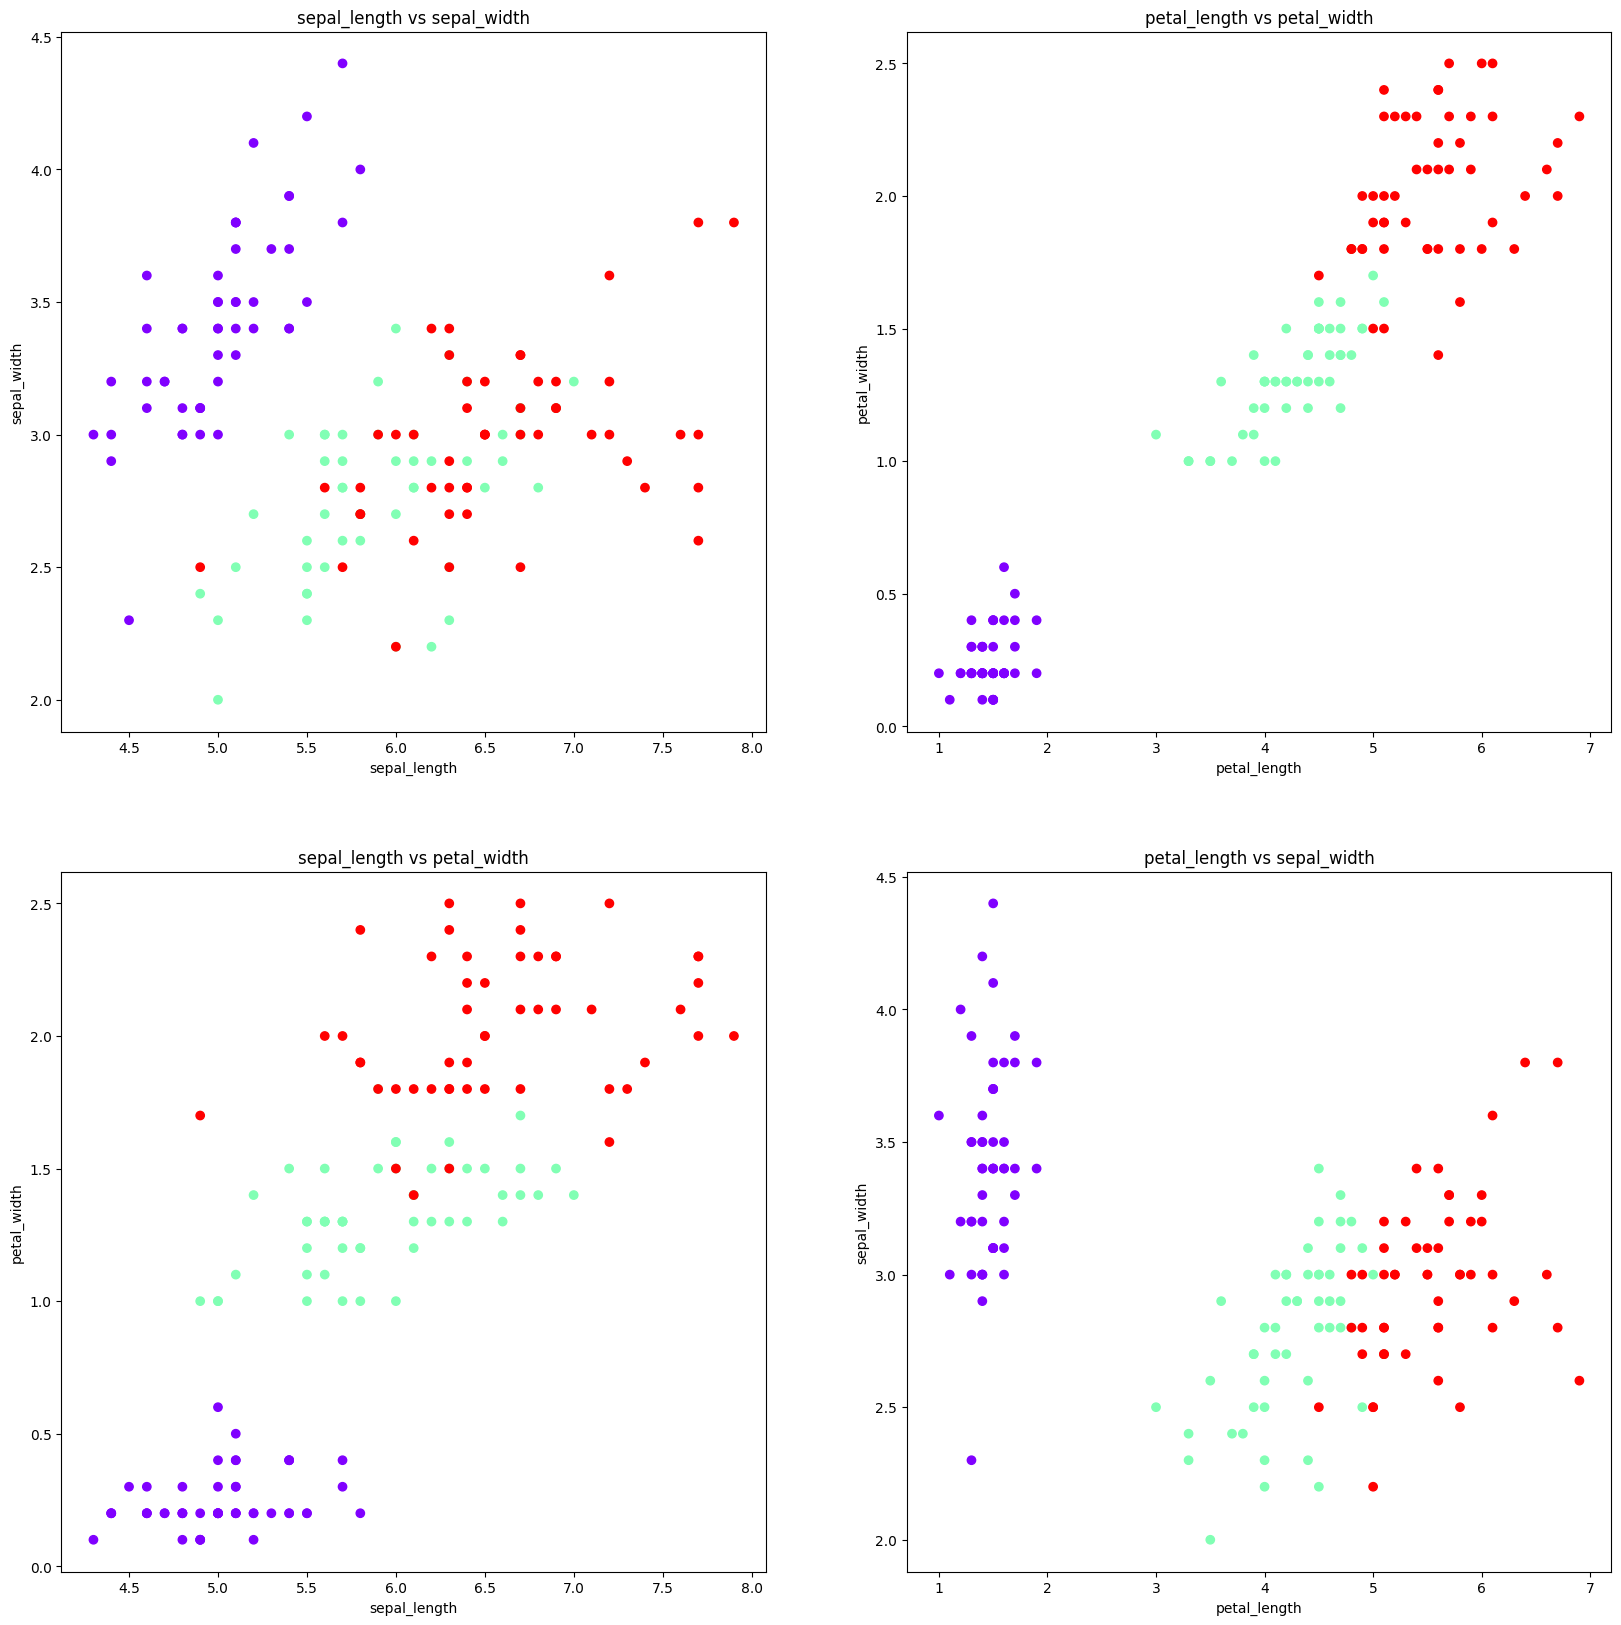

In [17]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,20))

ax1.scatter(raw_data['sepal_length'], raw_data['sepal_width'], c=raw_data.color, cmap='rainbow')
ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepal_width')
ax1.set_title('sepal_length vs sepal_width')
ax2.scatter(raw_data['petal_length'], raw_data['petal_width'], c=raw_data.color, cmap='rainbow')
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax2.set_title('petal_length vs petal_width')

ax3.scatter(raw_data['sepal_length'], raw_data['petal_width'], c=raw_data.color, cmap='rainbow')
ax3.set_xlabel('sepal_length')
ax3.set_ylabel('petal_width')
ax3.set_title('sepal_length vs petal_width')    

ax4.scatter(raw_data['petal_length'], raw_data['sepal_width'], c=raw_data.color, cmap='rainbow')
ax4.set_xlabel('petal_length')
ax4.set_ylabel('sepal_width')   
ax4.set_title('petal_length vs sepal_width')

plt.show()

Try out with Kmean of 3


In [18]:
kmeans = KMeans(3, random_state=10)
kmeans.fit(X)





c:\Git\python-for-data-science\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(150,)

Explore the label of the current cluster

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Get the centre of the cluster

In [29]:
centres= kmeans.cluster_centers_

Check the clustering comepare to the real data


In [30]:
scaled_df.columns
X_= scaled_df[['petal_length','petal_width']].values
petal_length_centriods= centres[:, 2]
petal_width_centriods= centres[:, 3]
petal_length_centriods
petal_width_centriods



array([ 1.01717187, -1.25512862,  0.28206327])

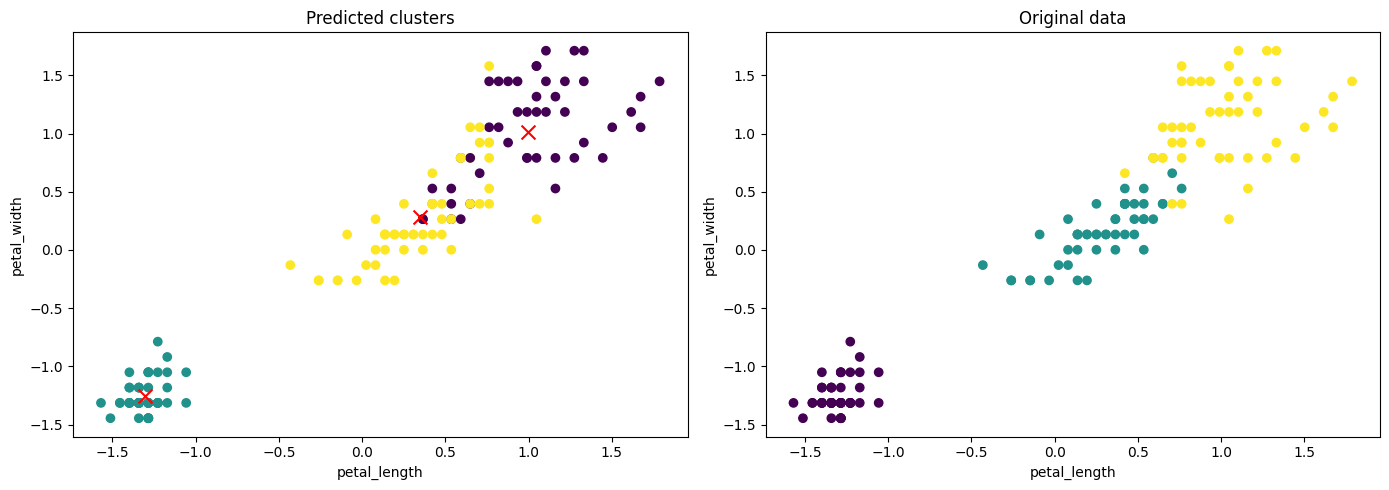

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) # Create a figure with two subplots.

ax1.scatter(X_[:,0], X_[:,1], c=kmeans.labels_) # Plot the clusters and the centroids
ax1.scatter(petal_length_centriods[:], petal_width_centriods[:], marker='x', s=100,c='red')
ax1.set_xlabel('petal_length')
ax1.set_ylabel('petal_width')
ax1.set_title('Predicted clusters')
ax2.scatter(X_[:,0], X_[:,1], c=raw_data['color']) # Plot the original data with the target variable.
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax2.set_title('Original data')
plt.tight_layout()
plt.show()

Calculate the silhouhette score

In [ ]:
# We can use the silhouette score to evaluate the quality of the clusters. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1. A score of 1 indicates that the object is far away from the neighbouring clusters. A score of 0 indicates that the object is on or very close to the decision boundary between two neighbouring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. The higher the silhouette score the better the clustering.
from sklearn.metrics import silhouette_score

print(f'Silhouette score: {silhouette_score(X_, kmeans.labels_)}') # Get the silhouette score for the clusters

Run some options with Kmean with different cluster number

In [98]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss







c:\Git\python-for-data-science\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Git\python-for-data-science\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Git\python-for-data-science\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Git\python-for-data-science\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

[600.0,
 223.73200573676348,
 140.96581663074699,
 114.38847745657692,
 91.06677122728536,
 80.24775400180886,
 71.30070564118623,
 63.18758788030172,
 55.37857313457827,
 47.391368769441726]

Plot the WCSS

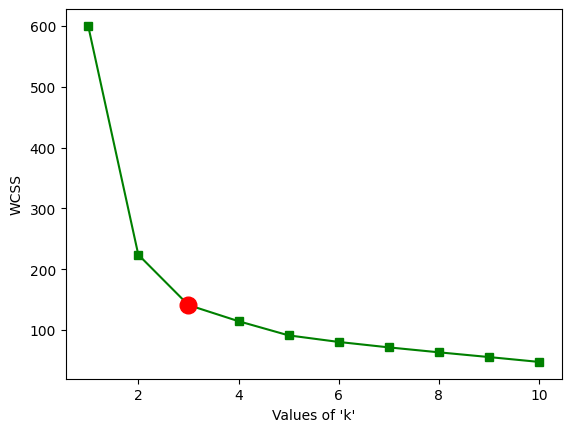

In [100]:
plt.plot([x for x in range(1, 11)], wcss, 'gs-') # Plot the elbow plot, the x axis is the number of clusters and the y axis is the WCSS.
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.plot([3], [wcss[2]], 'ro', ms=12, mfc='r') # Circle the elbow point on the plot, this is the optimal number of clusters.
plt.show() # Elbow method to determine the optimal number of clusters. The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. The optimal number of clusters is the value of k at the elbow i.e. the point after which the WCSS does not decrease significantly with every iteration.

So three is seem to be the best value for k which meet the original data set